### Overview
##### Read latest preprocessed SDG dataset and perform Exploratory Data Analysis (EDA).

### Library Imports

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import zip_longest

%matplotlib notebook

### Read Data File

In [2]:
nb_name = "1.1-sej-initial-data-exploration"

dataset_1 = 'preprocessed_data_query-sdg-full-regexp_2022-03-15_1-1.csv' # _1, _2 etc.. as need to list more than one data set being read in

In [3]:
df = pd.read_csv('../../data/processed/'+dataset_1,
                dtype = {'issn': str, 'doi': str, 'language': str}) 

# Pandas will start looking from where your current python file is located. 
# Therefore you can move from your current directory to where your data is located with '..'

In [4]:
df.columns

Index(['articletype_id', 'ptr_id', 'sdg_lst', 'authors', 'title', 'content',
       'keywords', 'date', 'year', 'month', 'issn', 'doi', 'handle',
       'institution_id', 'institution', 'active', 'no_listed_sdg',
       '1_listed_sdg', '2_listed_sdg', '3_listed_sdg', '4_listed_sdg',
       '5_listed_sdg', '6_listed_sdg', '7_listed_sdg', '8_listed_sdg',
       '9_listed_sdg', 'language', 'title_word_count', 'content_word_count'],
      dtype='object')

In [5]:
df.head(2).T

,0,1
articletype_id,13.0,14.0
ptr_id,13,14
sdg_lst,"2, 14",2
authors,"['Jansen, Jonathan D.']","['Jansen, Jonathan D.']"
title,Autonomy and accountability in the regulation ...,Intellectuals under fire
content,This article examines the struggles of the Sou...,Looks at the status of intellectuals in South ...
keywords,['accountability' 'autonomy' 'democracy' 'educ...,['cultural policy' 'democracy' 'intellectuals'...
date,2006-01-27,2006-01-27
year,2006.0,2006.0
month,1.0,1.0


### Data Quality

#### Nulls

In [6]:
# Check the number of nulls

df.isnull().sum() # Efficient query for checking the number of nulls accross columns in pandas

articletype_id             0
ptr_id                     0
sdg_lst                    0
authors                    0
title                      0
content                    0
keywords                   0
date                       1
year                       1
month                      1
issn                  102921
doi                   192722
handle                     0
institution_id             0
institution                0
active                     0
no_listed_sdg              0
1_listed_sdg               0
2_listed_sdg               0
3_listed_sdg               0
4_listed_sdg               0
5_listed_sdg               0
6_listed_sdg               0
7_listed_sdg               0
8_listed_sdg               0
9_listed_sdg               0
language              121313
title_word_count           0
content_word_count         0
dtype: int64

In [7]:
# Drop na values

df = df.dropna(subset=['sdg_lst','articletype_id'])

#### ID matches

In [8]:
# does the ptr_id and article_type_id match 

# Find the number of mismatches in id's

len([i for i in list(df.ptr_id == df.articletype_id) if i == False ])

0

# More features

### Library Imports

In [9]:
# If figures don't display : Javascript Error: IPython is not defined then unhide this line

%matplotlib inline

### Figures

In [10]:
fig_n=0

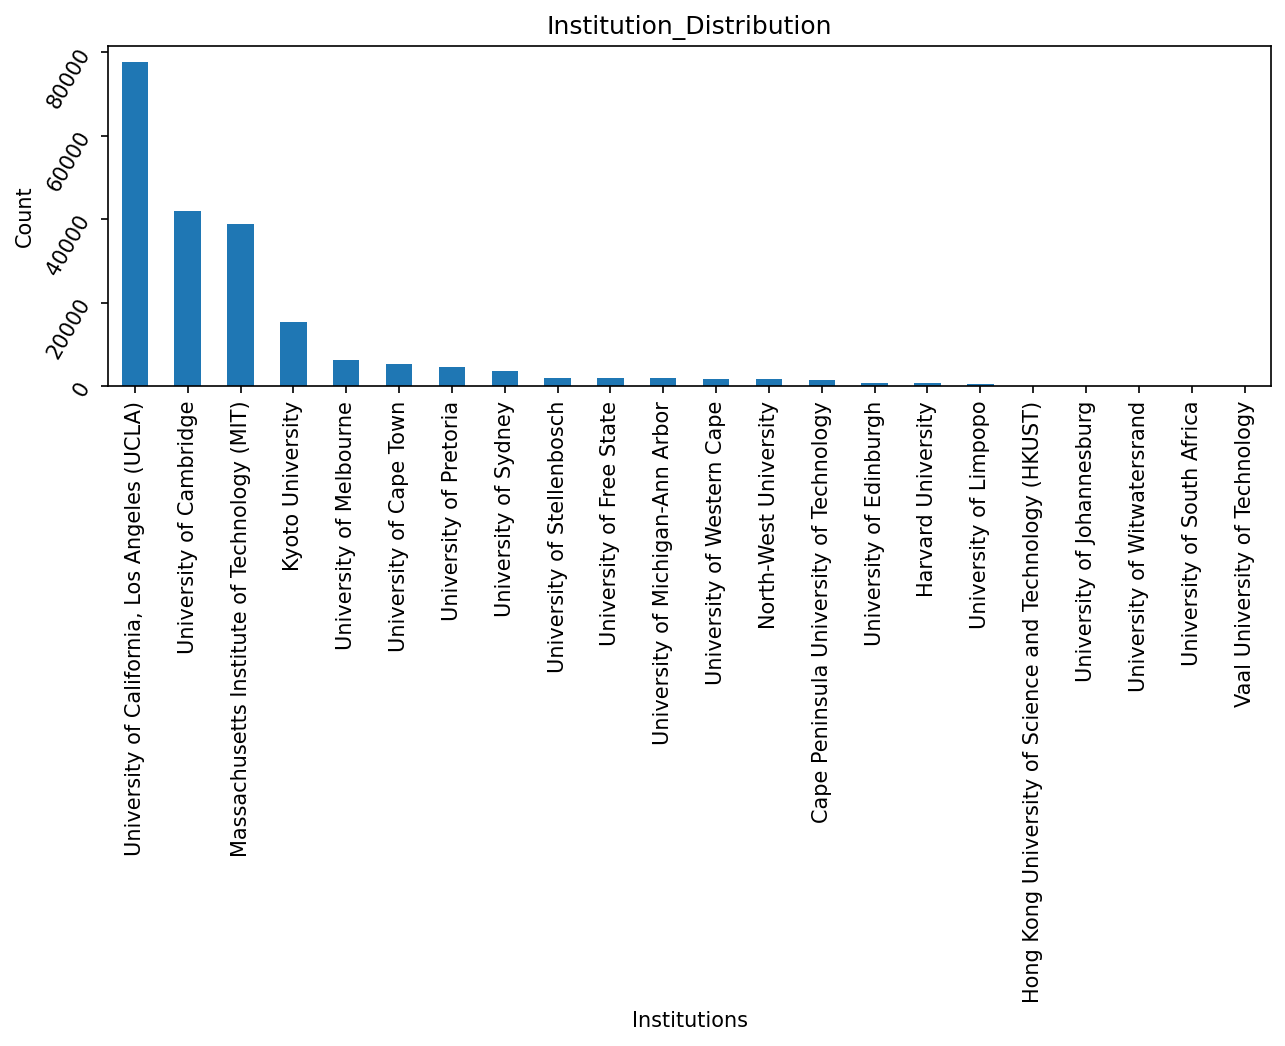

In [11]:
description = "Institution_Distribution" 
fig_n=+1
plt.figure(fig_n, figsize=(10, 3), dpi=150)
pd.Series(df.institution).value_counts().plot(kind='bar')
#sns.displot(df.language)   # ToDo- order if used

plt.ylabel('Count')
plt.xlabel('Institutions')
plt.title(description)
plt.xticks(rotation = 'vertical')
plt.yticks(rotation=60)
# plt.savefig("../../reports/figures/exploratory_data_analysis_visualisations/[%s]-[%s]-[%s].png"%(nb_name,\
#                                                                                                  dataset_1,\
#                                                                                                  description))
plt.show()

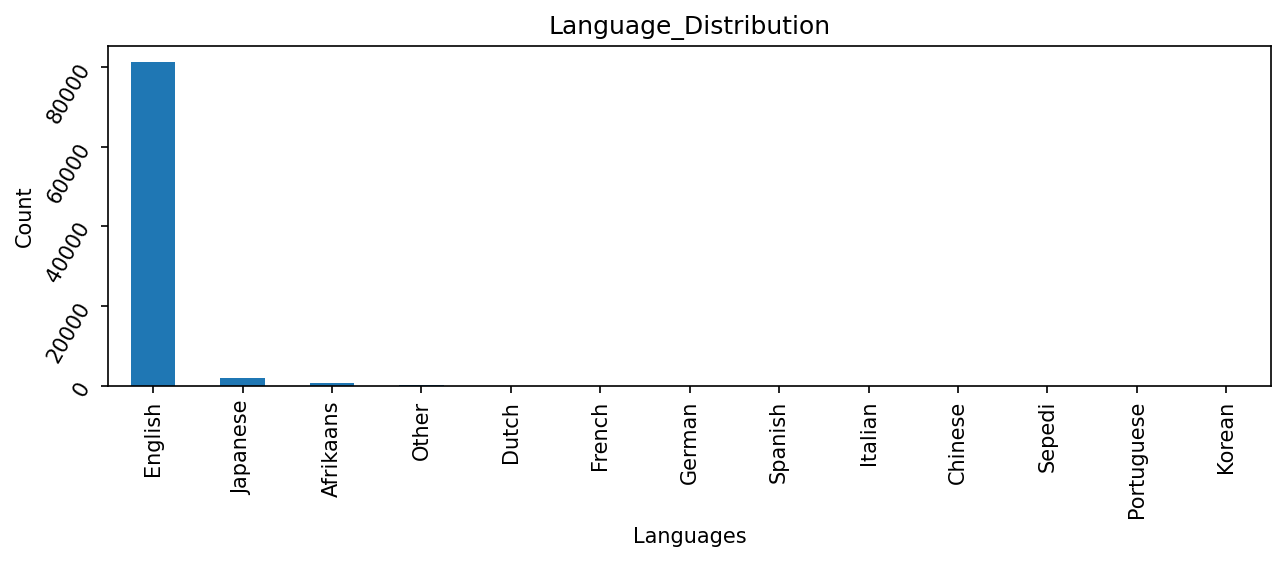

In [12]:
description = "Language_Distribution" 
fig=+1
plt.figure(fig_n, figsize=(10, 3), dpi=150)
pd.Series(df.language).value_counts().plot(kind='bar')
#sns.displot(df.language)   # ToDo- order if used

plt.ylabel('Count')
plt.xlabel('Languages')
plt.title(description)
plt.xticks(rotation = 'vertical')
plt.yticks(rotation=60)
# plt.savefig("../../reports/figures/exploratory_data_analysis_visualisations/[%s]-[%s]-[%s].png"%(nb_name,\
#                                                                                                  dataset_1,\
#                                                                                                  description))
plt.show()

### ToDo Trying to improve figures